## Read the data back into xarray

In [3]:
%time

# self contained read that works on the hub (make sure to run the pip install before)

import icechunk
import xarray as xr
import zarr

storage = icechunk.s3_storage(
    bucket='veda-eis-nldas',
    prefix='icechunk-test/NLDAS3-test2/',
    # anonymous=True,
    from_env=True,
)

virtual_credentials = icechunk.containers_credentials(
    {
        "s3://nasa-waterinsight/NLDAS3/forcing/daily/": icechunk.s3_anonymous_credentials()
    }
)
    
repo = icechunk.Repository.open(
    storage=storage,
    authorize_virtual_chunk_access=virtual_credentials,
)

session = repo.readonly_session('main')
ds = xr.open_zarr(session.store, consolidated=False, zarr_version=3)
ds

CPU times: user 3 μs, sys: 0 ns, total: 3 μs
Wall time: 5.72 μs


IcechunkError:   x error getting object from object store service error
  | 
  | context:
  |    0: icechunk::storage::s3::get_ref
  |            with ref_key="branch.main/ref.json"
  |              at icechunk/src/storage/s3.rs:742
  |    1: icechunk::refs::fetch_branch
  |            with name="main"
  |              at icechunk/src/refs.rs:381
  |    2: icechunk::refs::fetch_branch_tip
  |            with name="main"
  |              at icechunk/src/refs.rs:400
  |    3: icechunk::repository::exists
  |              at icechunk/src/repository.rs:336
  |    4: icechunk::repository::open
  |              at icechunk/src/repository.rs:244
  | 
  |-> error getting object from object store service error
  |-> service error
  |-> unhandled error (AccessDenied)
  `-> Error { code: "AccessDenied", message: "User: arn:aws:sts::444055461661:assumed-role/nasa-veda-prod/web-identity-token-1755712785205 is not authorized to perform: s3:GetObject on resource:
      \"arn:aws:s3:::veda-eis-nldas/icechunk-test/NLDAS3-test2/refs/branch.main/ref.json\" because no identity-based policy allows the s3:GetObject action", s3_extended_request_id: "A+pRd/
      KiZ+RSgxFow3xKMtQJYsPXI7ZFVJxYhmnKLb0oZYD+pT1KPVsioKWIppwQKxHCUB+HidikK09JpUeg/bbe2vWQ6fRD", aws_request_id: "DPK2RJ8F87PQ93NK" }


## Testing a timeseries at a single location

In [2]:
from dask.diagnostics import ProgressBar
with ProgressBar():
    timeseries = ds.sel(lon=-74.00, lat=40.71, method='nearest').load() # load timeseries close to NYC into memory

[########################################] | 100% Completed | 140.79 s


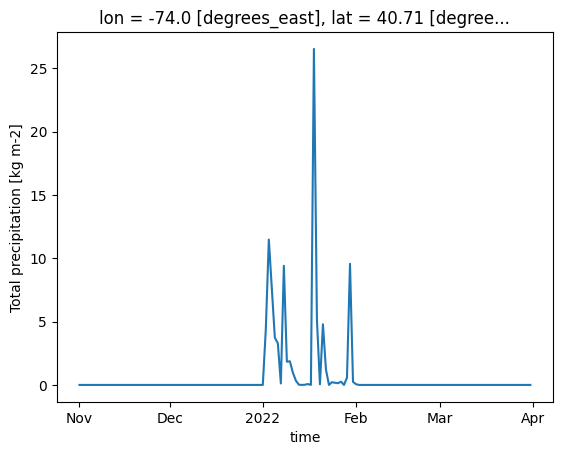

In [8]:
timeseries.sel(time=slice('2021-11','2022-03'))['Rainf'].plot()